In [3]:
import pandas as pd 
import numpy as np
data =pd.read_excel("Folds5x2_pp.xlsx")
print(data)
data.head()
data.tail()


         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [4]:
data.shape

(9568, 5)

In [6]:
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [8]:
data.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [10]:
# One way to count each species
data.PE.value_counts()

468.80    9
442.78    8
434.01    8
447.06    8
440.26    7
         ..
458.13    1
429.72    1
478.74    1
466.41    1
469.62    1
Name: PE, Length: 4836, dtype: int64

In [11]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data.describe()
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
range,35.300000,56.200000,40.410000,74.600000,75.500000


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
%matplotlib.inline



UsageError: Line magic function `%matplotlib.inline` not found.


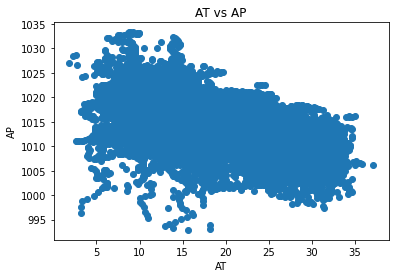

In [17]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.AT, data.)

# Label the axes
ax.set(xlabel='AT',
       ylabel='AP',
       title='AT vs AP');

In [19]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['PE']= label_encoder.fit_transform(data['PE'])
 
data['PE'].unique()

array([3001, 1544, 4711, ..., 4518, 1443, 3517], dtype=int64)

In [8]:
x=reg.drop(['PE'],axis=1).values
print(len(x))

9568


In [9]:
y=reg['PE'].values
print(len(y))

9568


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,)

In [11]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy')
                                       
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred=classifier.predict(x_test)

Text(0.5, 1.0, 'Decision tree using Entropy')

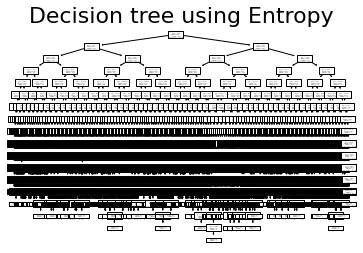

In [13]:
import matplotlib.pyplot as plt 
import sklearn as sklearn
sklearn.tree.plot_tree(classifier , max_depth=None, feature_names=None, class_names=None, label='all',
filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
plt.title('Decision tree using Entropy',fontsize=22)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(x_test)

In [16]:
model.predict([[14.96,41.76,1024.07,73.17]])

array([3330.06363004])

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9333858506285673

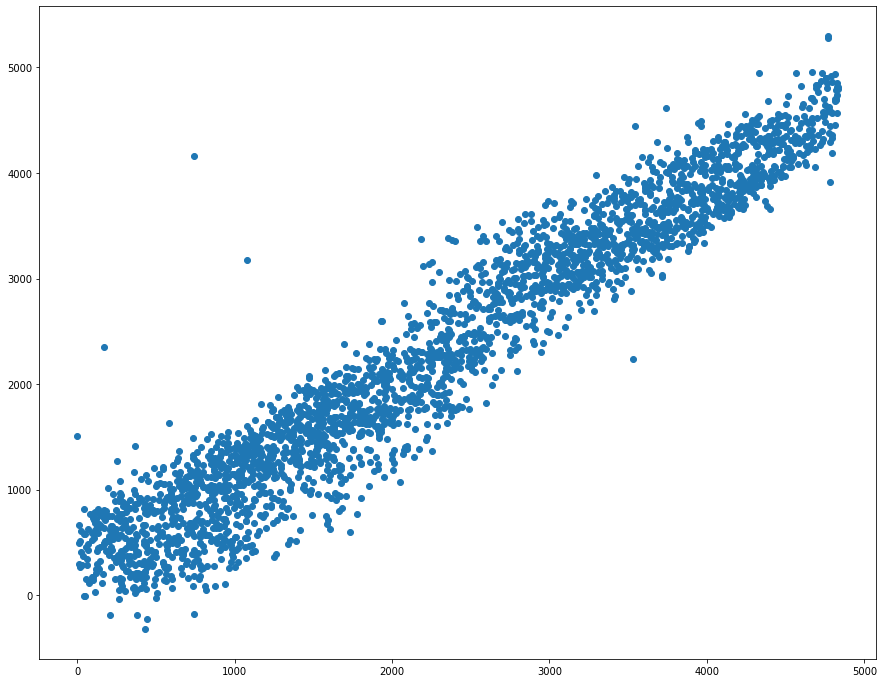

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.scatter(y_test,y_pred)
plt.show()

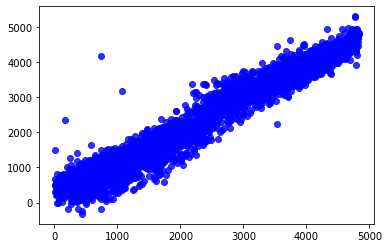

In [19]:
import seaborn as sns 
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');